In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [118]:
df=pd.read_excel(r'imp_features.xlsx')

In [119]:
df.head()


,Total_Spends,Income,Recency,WebVisits_Month,Web_Purchase,Store_Purchase,Catalog_Purchase,Deal_Purchase_Discount,Recency_Freshness_Medium,Marital_Status_Together,Kids,Marital_Status_Single,Age_Group_Senior,Teens,Age_Group_Senior Citizen,Recency_Freshness_Moderate,Education_Master,Marital_Status_Seperated,Education_PhD,Recency_Freshness_Recent,Camp_Spends,Wines,Fruits,Meat,Fish,Sweet,Gold
0,1617,58138,58,7,8,4,10,3,True,False,0,True,False,0,True,False,False,False,False,False,0,635,88,546,172,88,88
1,27,46344,38,5,1,2,1,2,False,False,2,True,False,1,True,True,False,False,False,False,0,11,1,6,2,1,6
2,776,71613,26,4,8,10,2,1,False,True,0,False,False,0,True,True,False,False,False,False,0,426,49,127,111,21,42
3,53,26646,26,6,2,4,0,2,False,True,1,False,True,0,False,True,False,False,False,False,0,11,4,20,10,3,5
4,422,58293,94,5,5,6,3,5,False,False,1,False,True,0,False,False,False,False,True,False,0,173,43,118,46,27,15


In [120]:
df.shape

(2021, 27)

In [121]:
df.columns

Index(['Total_Spends', 'Income', 'Recency', 'WebVisits_Month', 'Web_Purchase',
       'Store_Purchase', 'Catalog_Purchase', 'Deal_Purchase_Discount',
       'Recency_Freshness_Medium', 'Marital_Status_Together', 'Kids',
       'Marital_Status_Single', 'Age_Group_Senior', 'Teens',
       'Age_Group_Senior Citizen', 'Recency_Freshness_Moderate',
       'Education_Master', 'Marital_Status_Seperated', 'Education_PhD',
       'Recency_Freshness_Recent', 'Camp_Spends', 'Wines', 'Fruits', 'Meat',
       'Fish', 'Sweet', 'Gold'],
      dtype='object')

# **Normalize numerical features for clustering.**

In [122]:
X=X = df.drop(columns=['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']) 
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
# Create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled, columns=X.columns, index=X.index)

## **PCA**

In [123]:
# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(scaled)

# Print the reduced dimensions and explained variance
print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features: {X_pca.shape[1]}")
print(f"Cumulative explained variance: {pca.explained_variance_ratio_.cumsum()}")

Original number of features: 21
Reduced number of features: 15
Cumulative explained variance: [0.21417001 0.32672188 0.42437736 0.50345105 0.56607563 0.62778027
 0.68616821 0.74102222 0.78574945 0.82560187 0.86063285 0.89105256
 0.9159847  0.93927486 0.95798305]


**Scree Plot**

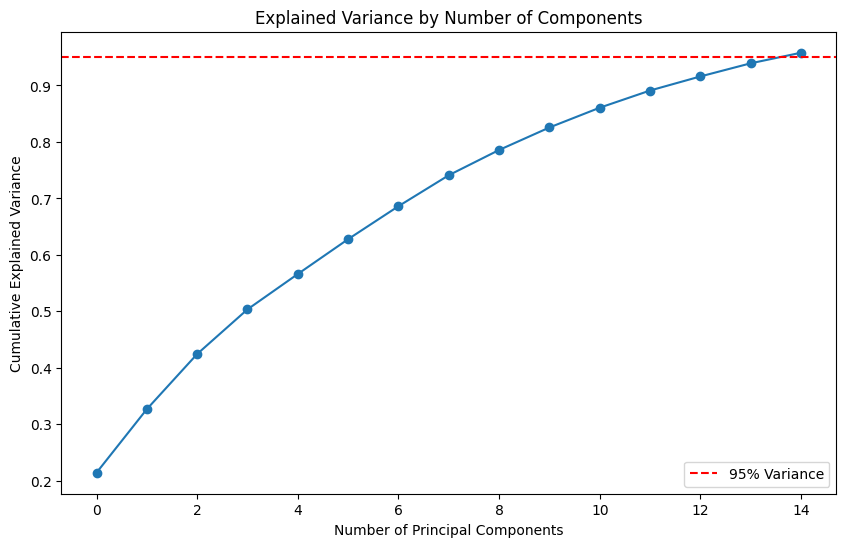

In [124]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.show()

In [125]:
df_pca=pd.DataFrame(X_pca)
df_pca.to_excel('PCA_data.xlsx', index=False)

# **K-Mean**

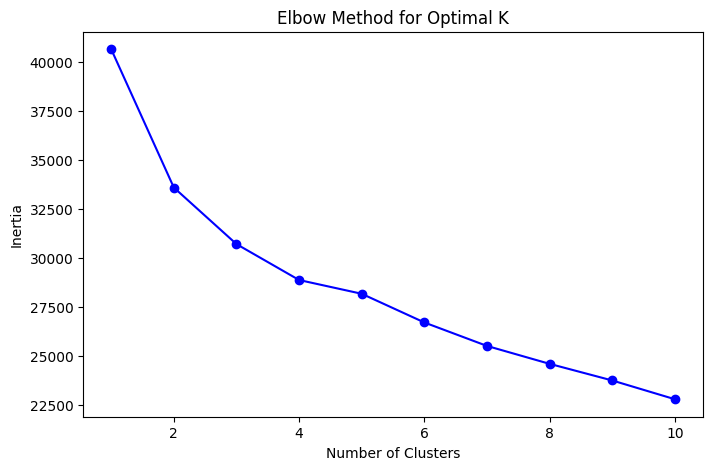

In [126]:

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Choose the number of clusters (e.g., k=3 based on the elbow curve)
#kmeans = KMeans(n_clusters=3, random_state=42)
#df_final['Cluster'] = kmeans.fit_predict(Wine_pca)

# Visualize clusters using a pairplot
#sb.pairplot(df_final, hue='Cluster', vars=numerical_features, palette='viridis')
#plt.show()

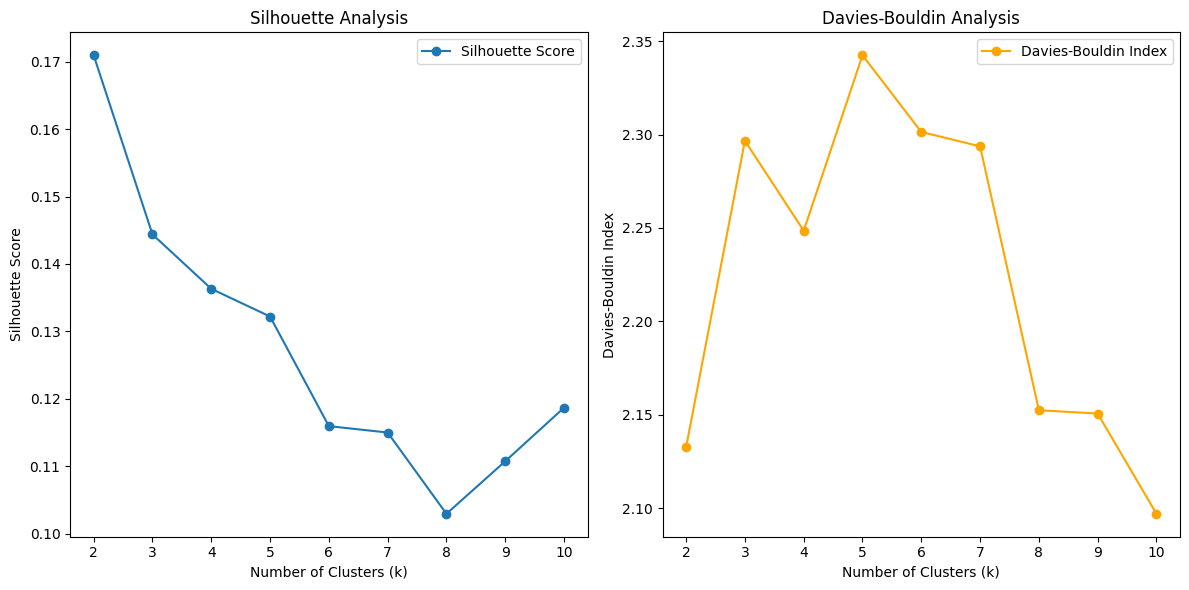


Best model based on Silhouette Score:
unique                   [0, 1]
frequency           [1158, 863]
Num_Clusters                  2
Silhouette_Score       0.170931
DBI                      2.1326
CH                   424.869348
Name: 0, dtype: object

Best model based on Davies-Bouldin Index:
unique                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
frequency           [229, 262, 219, 123, 174, 114, 291, 176, 202, ...
Num_Clusters                                                       10
Silhouette_Score                                             0.118705
DBI                                                           2.09696
CH                                                         175.481314
Name: 8, dtype: object

Best model based on Calinski-Harabasz Index:
unique                   [0, 1]
frequency           [1158, 863]
Num_Clusters                  2
Silhouette_Score       0.170931
DBI                      2.1326
CH                   424.869348
Name: 0, dtype: object

In [127]:

# Define the range of clusters to evaluate
k_range = range(2,11)  # Silhouette/Davies-Bouldin requires at least 2 clusters

# Initialize lists to store metrics
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
results=[]

# Perform clustering and calculate validation metrics
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    
    # Silhouette Score
    sil_score = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(sil_score)
    
    # Davies-Bouldin Index (lower is better)
    db_score = davies_bouldin_score(X_pca, cluster_labels)
    davies_bouldin_scores.append(db_score)
    
    ch_index = calinski_harabasz_score(X_pca, cluster_labels)
    calinski_harabasz_scores.append(ch_index)
    unique, frequency = np.unique(cluster_labels, 
                              return_counts = True)

    results.append((unique,frequency,len(set(cluster_labels)),sil_score,db_score,ch_index))

results_df = pd.DataFrame(
    results, columns=['unique','frequency','Num_Clusters','Silhouette_Score', 'DBI', 'CH']
)

# Plot Silhouette Scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()

# Plot Davies-Bouldin Index
plt.subplot(1, 2, 2)
plt.plot(k_range, davies_bouldin_scores, marker='o', color='orange', label='Davies-Bouldin Index')
plt.title('Davies-Bouldin Analysis')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.legend()

plt.tight_layout()
plt.show()

best_silhouette = results_df.loc[results_df['Silhouette_Score'].idxmax()]
best_dbi = results_df.loc[results_df['DBI'].idxmin()]
best_ch = results_df.loc[results_df['CH'].idxmax()]

print("\nBest model based on Silhouette Score:")
print(best_silhouette)
print("\nBest model based on Davies-Bouldin Index:")
print(best_dbi)
print("\nBest model based on Calinski-Harabasz Index:")
print(best_ch)

# Output optimal clusters
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
optimal_k_davies_bouldin = k_range[np.argmin(davies_bouldin_scores)]
optimal_k_best_ch = results_df.loc[results_df['CH'].idxmax()]

print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}")
print (f"Silhouet Score for 2 to 15 K value {silhouette_scores}")
print (f"Davies-Bouldin Index for 2 to 15 K value {davies_bouldin_scores}")
print(f"Optimal k (Davies-Bouldin Index): {optimal_k_davies_bouldin}")


* **Silhouette Score suggests that 𝑘 =** 2 is the best choice for clustering, as it has the highest score.
* **Davies-Bouldin Index suggests that 𝑘 =** 10 offers the best clustering configuration with the lowest index score.


* **𝑘 = 3: This might be a good middle ground. If we aiming for more granularity without overcomplicating the segmentation, 3 clusters can provide more detail while still maintaining interpretability. The Davies-Bouldin Index also supports 𝑘 = 3 as a reasonable choice for separation and compactness**

In [128]:


# Apply K-Means to the PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42,init='k-means++')  # Choose the number of clusters (3 is an example)
Cluster=kmeans.fit_predict(X_pca)
K_mean_df=df
# Add cluster labels to the original dataset
K_mean_df['Cluster'] = kmeans.labels_

# Analyze clusters
print(K_mean_df.groupby('Cluster')['Fish'].mean())

Cluster
0     8.488109
1    35.693498
2    92.365854
Name: Fish, dtype: float64


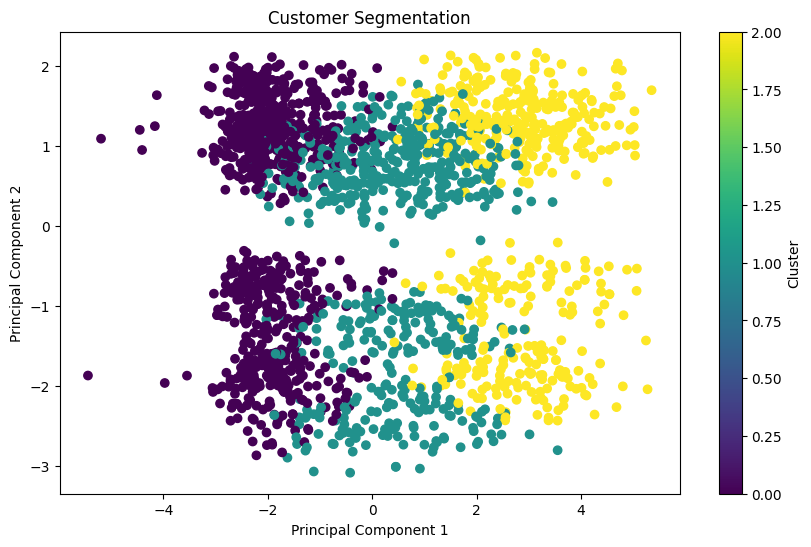

In [129]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 2], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segmentation')
plt.colorbar(label='Cluster')
plt.show()

# **best Silhouette Score**

In [130]:
best_silhouette

unique                   [0, 1]
frequency           [1158, 863]
Num_Clusters                  2
Silhouette_Score       0.170931
DBI                      2.1326
CH                   424.869348
Name: 0, dtype: object

In [131]:
# Apply K_Mean clustering
Sil_model = KMeans(n_clusters=2, random_state=42,init='k-means++') 
sil_labels = Sil_model.fit_predict(X_pca)

# Evaluate clustering quality

print(f"The average silhouette score for K_Mean is: {silhouette_score(X_pca, sil_labels)}")
print(f"The Davies-Bouldin Index for K_Mean is: {davies_bouldin_score(X_pca, sil_labels)}")
print(f"The Calinski-Harabasz Index for K_Mean is: {calinski_harabasz_score(X_pca, sil_labels)}")

The average silhouette score for K_Mean is: 0.17093058498440988
The Davies-Bouldin Index for K_Mean is: 2.132599741072779
The Calinski-Harabasz Index for K_Mean is: 424.86934786478827


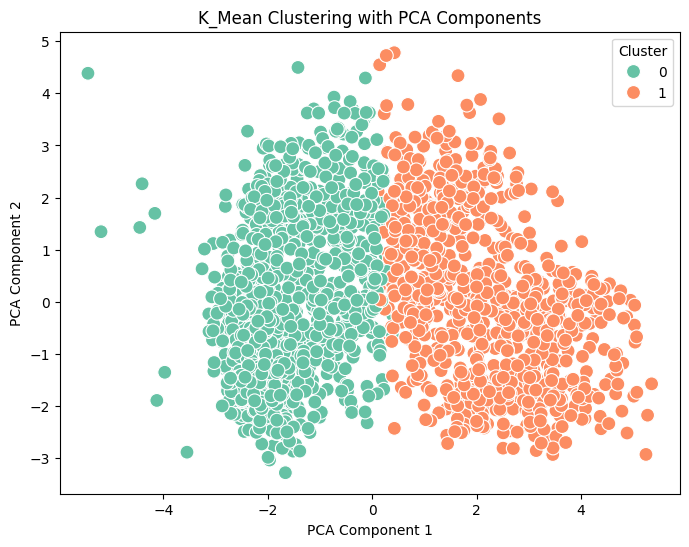

In [132]:
# Visualize the K_Mean clusters in the PCA space
plt.figure(figsize=(8, 6))

# Scatter plot: Points labeled by their cluster assignment
sns.scatterplot(x=df_pca[0], y=df_pca[1], hue=sil_labels, palette='Set2', s=100)

plt.title('K_Mean Clustering with PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.show()

# **davies bouldin index**

In [133]:
best_dbi

unique                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
frequency           [229, 262, 219, 123, 174, 114, 291, 176, 202, ...
Num_Clusters                                                       10
Silhouette_Score                                             0.118705
DBI                                                           2.09696
CH                                                         175.481314
Name: 8, dtype: object

In [134]:
# Apply K_Mean clustering
dbi_model = KMeans(n_clusters=2, random_state=42,init='k-means++') 
dbi_labels = dbi_model.fit_predict(X_pca)

# Evaluate clustering quality

print(f"The average silhouette score for K_Mean is: {silhouette_score(X_pca, dbi_labels)}")
print(f"The Davies-Bouldin Index for K_Mean is: {davies_bouldin_score(X_pca, dbi_labels)}")
print(f"The Calinski-Harabasz Index for K_Mean is: {calinski_harabasz_score(X_pca, dbi_labels)}")

The average silhouette score for K_Mean is: 0.17093058498440988
The Davies-Bouldin Index for K_Mean is: 2.132599741072779
The Calinski-Harabasz Index for K_Mean is: 424.86934786478827


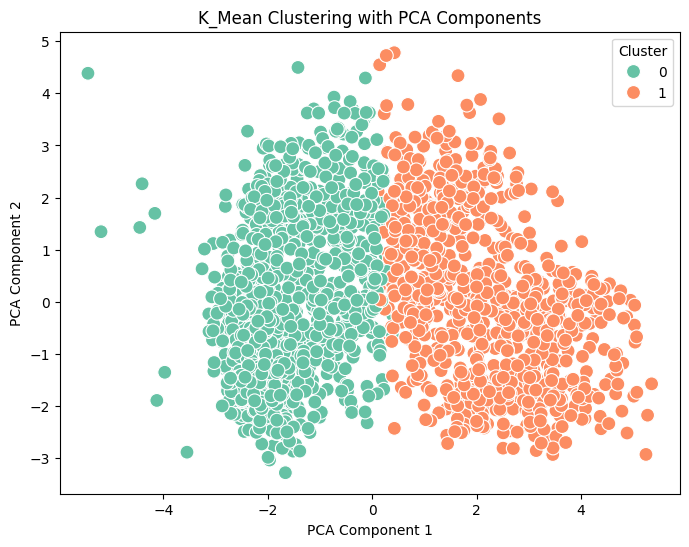

In [135]:
# Visualize the K_Mean Clustering in the PCA space
plt.figure(figsize=(8, 6))

# Scatter plot: Points labeled by their cluster assignment
sns.scatterplot(x=df_pca[0], y=df_pca[1], hue=dbi_labels, palette='Set2', s=100)

plt.title('K_Mean Clustering with PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.show()

In [136]:
unique, frequency = np.unique(dbi_labels, 
                              return_counts = True)
# print unique values array
print("Unique Values:", 
      unique)
 
# print frequency array
print("Frequency Values:",
      frequency)

Unique Values: [0 1]
Frequency Values: [1158  863]


# **calinski_harabasz_index**

In [137]:
best_ch

unique                   [0, 1]
frequency           [1158, 863]
Num_Clusters                  2
Silhouette_Score       0.170931
DBI                      2.1326
CH                   424.869348
Name: 0, dtype: object

In [138]:
# Apply K_Mean clustering
Ch_model = KMeans(n_clusters=2, random_state=42,init='k-means++') 
ch_labels = Ch_model.fit_predict(X_pca)

# Evaluate clustering quality

print(f"The average silhouette score for K_Mean is: {silhouette_score(X_pca, ch_labels)}")
print(f"The Davies-Bouldin Index for K_Mean is: {davies_bouldin_score(X_pca, ch_labels)}")
print(f"The Calinski-Harabasz Index for K_Mean is: {calinski_harabasz_score(X_pca, ch_labels)}")

The average silhouette score for K_Mean is: 0.17093058498440988
The Davies-Bouldin Index for K_Mean is: 2.132599741072779
The Calinski-Harabasz Index for K_Mean is: 424.86934786478827


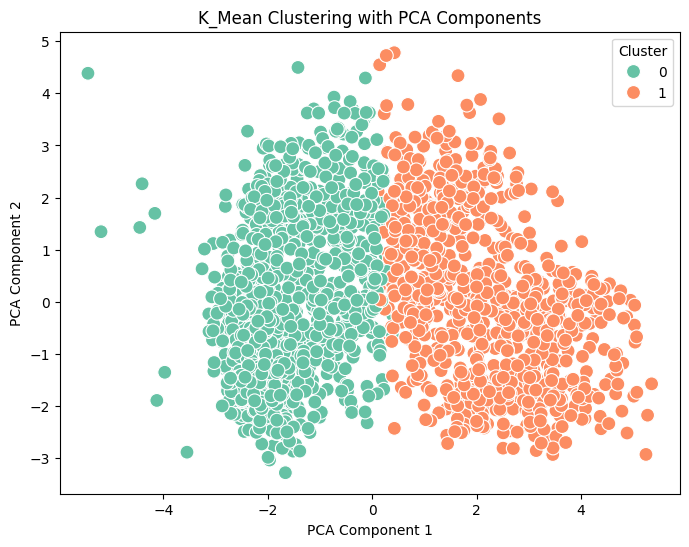

In [139]:
# Visualize the K_Mean Clustering in the PCA space
plt.figure(figsize=(8, 6))

# Scatter plot: Points labeled by their cluster assignment
sns.scatterplot(x=df_pca[0], y=df_pca[1], hue=ch_labels, palette='Set2', s=100)

plt.title('K_Mean Clustering with PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.show()

In [140]:
df['label']=ch_labels

In [141]:
df.to_excel('label_df.xlsx', index=False)

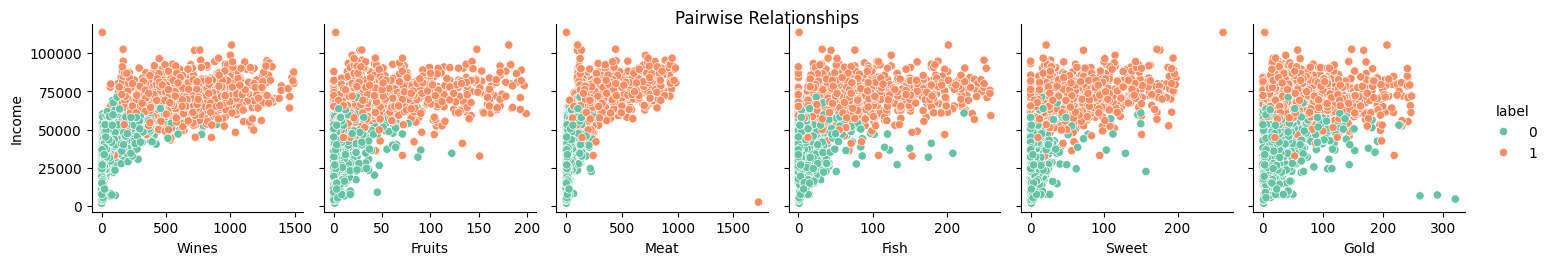

In [142]:
sns.pairplot(df, 
             x_vars=['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold'],
             y_vars=['Income'], 
             hue='label',  # Specify 'Cluster' as the column for hue
             palette='Set2')

# Add title and show plot
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

In [143]:
unique, frequency = np.unique(ch_labels, 
                              return_counts = True)
# print unique values array
print("Unique Values:", 
      unique)
 
# print frequency array
print("Frequency Values:",
      frequency)

Unique Values: [0 1]
Frequency Values: [1158  863]


In [144]:
frequency[0]

1158

In [145]:
results_df

,unique,frequency,Num_Clusters,Silhouette_Score,DBI,CH
0,"[0, 1]","[1158, 863]",2,0.170931,2.132600,424.869348
1,"[0, 1, 2]","[883, 646, 492]",3,0.144385,2.296694,327.297726
2,"[0, 1, 2, 3]","[685, 333, 475, 528]",4,0.136321,2.248481,274.698214
3,"[0, 1, 2, 3, 4]","[717, 354, 274, 432, 244]",5,0.132213,2.342450,223.654473
4,"[0, 1, 2, 3, 4, 5]","[363, 334, 263, 410, 206, 445]",6,0.115973,2.301406,210.783332
5,"[0, 1, 2, 3, 4, 5, 6]","[332, 213, 207, 301, 201, 416, 351]",7,0.115022,2.293675,199.606820
6,"[0, 1, 2, 3, 4, 5, 6, 7]","[264, 318, 332, 148, 303, 122, 319, 215]",8,0.102982,2.152402,188.084731
7,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[202, 338, 253, 125, 282, 116, 300, 204, 201]",9,0.110769,2.150618,179.381555
8,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[229, 262, 219, 123, 174, 114, 291, 176, 202, ...",10,0.118705,2.096960,175.481314


****

In [146]:
best_silhouette = results_df.loc[results_df['Silhouette_Score'].idxmax()]
best_dbi = results_df.loc[results_df['DBI'].idxmin()]
best_ch = results_df.loc[results_df['CH'].idxmax()]

In [147]:
# Log best Silhouette Score model
# Set up MLflow experiment
mlflow.set_experiment("K_Mean Clustering Tuning")
with mlflow.start_run(run_name="Best_Silhouette__KMean"):
    mlflow.log_params({'n_clusters': best_silhouette['Num_Clusters']})
    mlflow.log_metrics({
        'Silhouette_Score': best_silhouette['Silhouette_Score'],
        'davies_bouldin_index': best_silhouette['DBI'],
        'calinski_harabasz_index': best_silhouette['CH']
    })

# Log best Davies-Bouldin Index model
with mlflow.start_run(run_name="Best_DBI_KMean"):
    mlflow.log_params({'n_clusters': best_dbi['Num_Clusters']})
    mlflow.log_metrics({
        'Silhouette_Score': best_dbi['Silhouette_Score'],
        'davies_bouldin_index': best_dbi['DBI'],
        'calinski_harabasz_index': best_dbi['CH']
    })

# Log best Calinski-Harabasz Index model
with mlflow.start_run(run_name="Best_CH_KMean"):
    mlflow.log_params({'n_clusters': best_ch['Num_Clusters']})
    mlflow.log_metrics({
        'Silhouette_Score': best_ch['Silhouette_Score'],
        'davies_bouldin_index': best_ch['DBI'],
        'calinski_harabasz_index': best_ch['CH']
    })
